In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import metrics

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import math
from math import sqrt
from math import pi
from math import exp
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
train = pd.read_csv('/content/drive/MyDrive/Training.csv')
test = pd.read_csv('/content/drive/MyDrive/Testing.csv')

X_train = train.drop(["House ID", "Construction type"], axis=1)
X_test = test.drop(["House ID", "Construction type"], axis=1)

Y_train = train["Construction type"]
Y_test = test["Construction type"]

feature_cols = X_train.columns
print(feature_cols)
print(X_test)

Index(['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages',
       '# Rooms', '# Bedrooms', 'Age of home'],
      dtype='object')
   Local Price  Bathrooms  Land Area  Living area  # Garages  # Rooms  \
0       6.0931        1.5     6.7265        1.652        1.0        6   
1       8.3607        1.5     9.1500        1.777        2.0        8   
2       8.1400        1.0     8.0000        1.504        2.0        7   
3       9.1416        1.5     7.3262        1.831        1.5        8   
4      12.0000        1.5     5.0000        1.200        2.0        6   

   # Bedrooms  Age of home  
0           3           44  
1           4           48  
2           3            3  
3           4           31  
4           3           30  


## QUESTION 1


1. Please check the PDF attachment for detail part of conditional probability distribution for two features. For other conditional probability distributions, please refer to the mean_std_train table below
for the corresponding mean and std values will be used.

In [23]:
#mean_std_train FILE: row from 0 to 7 are corresponding features: 'Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home'
#               column from 0 to 5 are: mean_apartment, std_apartment, mean_house, std_house, mean_condo, std_condo 

mean_std_train = pd.read_csv('/content/drive/MyDrive/Mean_STD.csv')
mean_std_train.columns = ['mean_apartment', 'std_apartment', 'mean_house', 'std_house', 'mean_condo', 'std_condo']
print(mean_std_train)



   mean_apartment  std_apartment  mean_house  std_house  mean_condo  std_condo
0        7.332743       3.615997    5.760743   0.570121    7.415900   4.611248
1        1.285714       0.566947    1.071429   0.188982    1.333333   0.605530
2        6.103857       3.258509    6.630900   2.248973    6.024667   2.544777
3        1.505000       0.704106    1.391714   0.212924    1.553333   0.923441
4        1.214286       0.698638    1.071429   0.838082    1.333333   0.516398
5        6.857143       1.345185    6.142857   0.690066    6.833333   1.602082
6        3.428571       0.975900    3.000000   0.577350    3.333333   0.816497
7       38.714286      14.682351   34.285714  12.724180   39.666667  13.952300


2. Please find the calculation below:
- Calculated based on training conditional probability with 5 testing records. P(C) are calculated as: P(apartment) = 7/20; P(house) = 7/20; P(condo) = 6/20
- Conditional probability for c for a record which has features X1...Xj = (1 / (sqrt(2 * pi) * stdev)) * exp(-((x1 - mean)**2 / (2 * stdev**2 ))) *... [Same equation but mean, stdev and values run from X2 to Xj]... * P(c)

In [24]:
L_X_test = X_test.to_numpy() #convert to numpy for easy looping
print("Testing data:\n", L_X_test)

Testing data:
 [[ 6.0931  1.5     6.7265  1.652   1.      6.      3.     44.    ]
 [ 8.3607  1.5     9.15    1.777   2.      8.      4.     48.    ]
 [ 8.14    1.      8.      1.504   2.      7.      3.      3.    ]
 [ 9.1416  1.5     7.3262  1.831   1.5     8.      4.     31.    ]
 [12.      1.5     5.      1.2     2.      6.      3.     30.    ]]


In [25]:
def MAP(x):
    apt = []
    house = []
    condo = []

    for i in range(0,5):
        p_apt = (1 / (sqrt(2 * pi) * 3.615997235)) * exp(-((x[i][0] - 7.332742857)**2 / (2 * 3.615997235**2 )))*(1 / (sqrt(2 * pi) * 0.56694671)) * exp(-((x[i][1] - 1.285714286)**2 / (2 * 0.56694671**2 )))*(1 / (sqrt(2 * pi) * 3.258509497)) * exp(-((x[i][2] - 6.103857143)**2 / (2 * 3.258509497**2 )))*(1 / (sqrt(2 * pi) * 0.704105816)) * exp(-((x[i][3] - 1.505)**2 / (2 * 0.704105816**2 )))*(1 / (sqrt(2 * pi) * 0.698638131)) * exp(-((x[i][4] - 1.214285714)**2 / (2 * 0.698638131**2 )))*(1 / (sqrt(2 * pi) * 1.345185418)) * exp(-((x[i][5] - 6.857142857)**2 / (2 * 1.345185418**2 )))*(1 / (sqrt(2 * pi) * 0.975900073)) * exp(-((x[i][6] - 3.428571429)**2 / (2 * 0.975900073**2 )))*(1 / (sqrt(2 * pi) * 14.68235092)) * exp(-((x[i][7] - 38.71428571)**2 / (2 * 14.68235092**2 )))*7/20
        apt.append(p_apt)
        p_house = (1 / (sqrt(2 * pi) * 0.5701212)) * exp(-((x[i][0] - 5.76074285)**2 / (2 * 0.5701212**2 )))*(1 / (sqrt(2 * pi) * 0.18898223)) * exp(-((x[i][1] - 1.071428571)**2 / (2 * 0.188982237**2 )))*(1 / (sqrt(2 * pi) * 2.248973218)) * exp(-((x[i][2] - 6.6309)**2 / (2 * 2.248973218**2 )))*(1 / (sqrt(2 * pi) * 0.212923863)) * exp(-((x[i][3] - 1.391714286)**2 / (2 * 0.212923863**2 )))*(1 / (sqrt(2 * pi) * 0.83808171)) * exp(-((x[i][4] - 1.071428571)**2 / (2 * 0.83808171**2 )))*(1 / (sqrt(2 * pi) * 0.690065559)) * exp(-((x[i][5] - 6.142857143)**2 / (2 * 0.690065559**2 )))*(1 / (sqrt(2 * pi) * 0.577350269)) * exp(-((x[i][6] - 3)**2 / (2 * 0.577350269**2 )))*(1 / (sqrt(2 * pi) * 12.72418021)) * exp(-((x[i][7] - 34.28571429)**2 / (2 * 12.72418021**2 )))*7/20
        house.append(p_house)
        p_condo = (1 / (sqrt(2 * pi) * 4.611247858)) * exp(-((x[i][0] - 7.4159)**2 / (2 * 4.611247858**2 )))*(1 / (sqrt(2 * pi) * 0.605530071)) * exp(-((x[i][1] - 1.333333333)**2 / (2 * 0.605530071**2 )))*(1 / (sqrt(2 * pi) * 2.544777371)) * exp(-((x[i][2] - 6.024666667)**2 / (2 * 2.544777371**2 )))*(1 / (sqrt(2 * pi) * 0.923441317)) * exp(-((x[i][3] - 1.553333333)**2 / (2 * 0.923441317**2 )))*(1 / (sqrt(2 * pi) * 0.516397779)) * exp(-((x[i][4] - 1.333333333)**2 / (2 * 0.516397779**2 )))*(1 / (sqrt(2 * pi) * 1.602081979)) * exp(-((x[i][5] - 6.833333333)**2 / (2 * 1.602081979**2 )))*(1 / (sqrt(2 * pi) * 0.816496581)) * exp(-((x[i][6] - 3.333333333)**2 / (2 * 0.816496581**2 )))*(1 / (sqrt(2 * pi) * 13.95229969)) * exp(-((x[i][7] - 39.66666667)**2 / (2 * 13.95229969**2 )))*6/20
        condo.append(p_condo)


    return apt, house, condo



apt, house, condo = MAP(L_X_test)

for i in range(0,5):
    print("Testing data",i+1,": conditional probability for apartment, house and condo are", apt[i], house[i], condo[i])
    #find maximum cond. prob. and classify 
    if apt[i] >= house[i] and apt[i] >= condo[i]:
        print("Classified as Apartment")
    elif house[i] >= apt[i] and house[i] >= condo[i]:
        print("Classified as House")
    else: print("Classified as Condo")
      





Testing data 1 : conditional probability for apartment, house and condo are 1.9821473782297947e-06 2.2783349041147312e-05 1.7117341611486767e-06
Classified as House
Testing data 2 : conditional probability for apartment, house and condo are 4.855709000676494e-07 4.48006554863752e-13 2.679117293006266e-07
Classified as Apartment
Testing data 3 : conditional probability for apartment, house and condo are 6.402867262940849e-08 1.3881097866546632e-09 2.456670360807884e-08
Classified as Apartment
Testing data 4 : conditional probability for apartment, house and condo are 1.1475454137073563e-06 1.0401948484986661e-15 1.008087240388542e-06
Classified as Apartment
Testing data 5 : conditional probability for apartment, house and condo are 4.074290937712743e-07 1.9782240062451416e-31 4.305093218766149e-07
Classified as Condo


## QUESTION 2

1. With default parameters, accuracy on training set is 1.0 but the test set is only 0.4. 
That makes sense because decision tree training will overfit. There are not a lot of data so 0.4 accuracy is not surprised

In [26]:
init = DecisionTreeClassifier()
basic_dt = init.fit(X_train, Y_train)

Y_pred = basic_dt.predict(X_train)
print("Accuracy on training set:",metrics.accuracy_score(Y_train, Y_pred))

Y_pred1 = basic_dt.predict(X_test)
print("Accuracy on testing set:",metrics.accuracy_score(Y_test, Y_pred1))


Accuracy on training set: 1.0
Accuracy on testing set: 0.4


2. Restricting the maximum depth of the tree will show different training and testing accuracy for the model.
With max_depth run from 1 to 16, the highest test accuracy = 0.6 with max_depth = 2. From max_depth = 5 or greater, training and testing accuracy are unchanged

3. Restricting the maximum depth of the tree will reduce overfit on the model, and bring some bias for better performance so it has a strong effect on the classifier performance

In [27]:
acc_train = []
acc_test = []
for max_depth in range(1,16):
    
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf = clf.fit(X_train,Y_train)
    print('Set maximum depth of the tree to '+ str(max_depth))
    #train dataset
    y_pred = clf.predict(X_train)
    print("Accuracy of training:",metrics.accuracy_score(Y_train, y_pred))
    acc_train.append(metrics.accuracy_score(Y_train, y_pred))
    #test dataset
    y_pred = clf.predict(X_test)
    print("Accuracy of testing:",metrics.accuracy_score(Y_test, y_pred))
    acc_test.append(metrics.accuracy_score(Y_test, y_pred))

Set maximum depth of the tree to 1
Accuracy of training: 0.55
Accuracy of testing: 0.4
Set maximum depth of the tree to 2
Accuracy of training: 0.75
Accuracy of testing: 0.6
Set maximum depth of the tree to 3
Accuracy of training: 0.9
Accuracy of testing: 0.4
Set maximum depth of the tree to 4
Accuracy of training: 0.95
Accuracy of testing: 0.4
Set maximum depth of the tree to 5
Accuracy of training: 1.0
Accuracy of testing: 0.4
Set maximum depth of the tree to 6
Accuracy of training: 1.0
Accuracy of testing: 0.4
Set maximum depth of the tree to 7
Accuracy of training: 1.0
Accuracy of testing: 0.4
Set maximum depth of the tree to 8
Accuracy of training: 1.0
Accuracy of testing: 0.4
Set maximum depth of the tree to 9
Accuracy of training: 1.0
Accuracy of testing: 0.4
Set maximum depth of the tree to 10
Accuracy of training: 1.0
Accuracy of testing: 0.4
Set maximum depth of the tree to 11
Accuracy of training: 1.0
Accuracy of testing: 0.4
Set maximum depth of the tree to 12
Accuracy of t

4. Visualizing the tree

According to the Decision Tree, for the given example: 
- Age of home <= 36 = 'True' --> jump to the purple node in 2nd level
- Local Price <= 8.411 = 'False' --> jump to the orange node in 3rd level --> class = Apartment

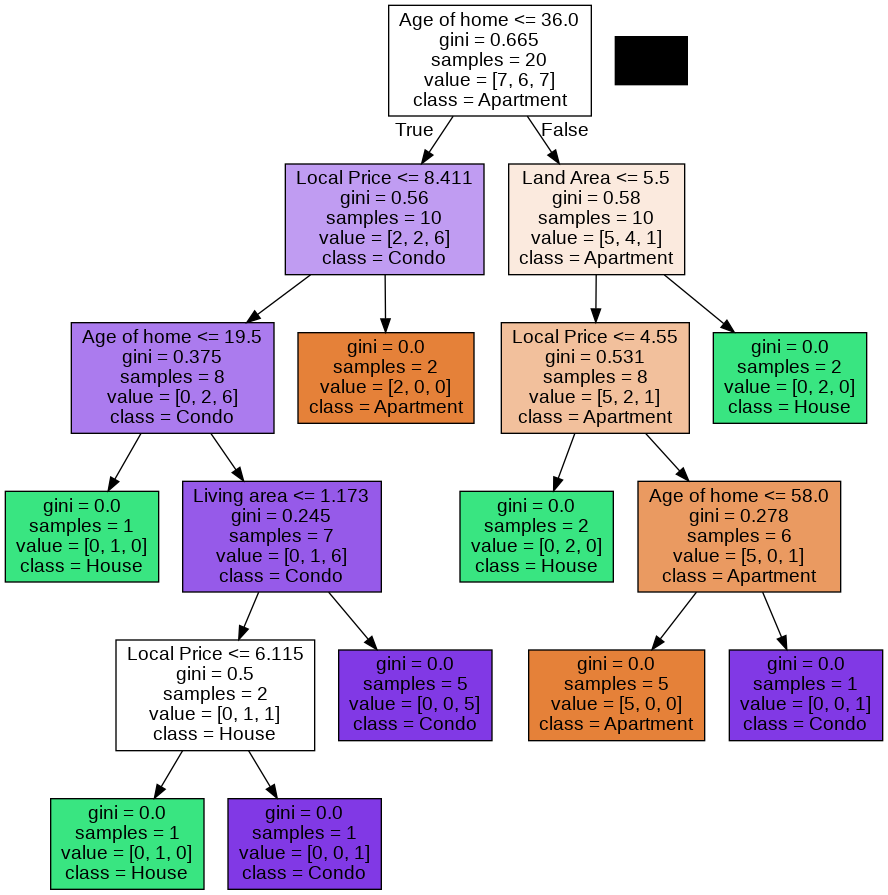

In [28]:
dot_data_file = StringIO()
export_graphviz(clf, out_file=dot_data_file,  
                filled=True, feature_names = feature_cols,class_names=['Apartment','House','Condo'])
tree = pydotplus.graph_from_dot_data(dot_data_file.getvalue())  
Image(tree.create_png())

## QUESTION 3

Steps for k-nearest neighbors is as below:
- Calculate euclidean distance of testing data with training data
- Sort the distances and set k-closest training data points to x
- Use majority voting, label testing data to most frequently occuring class
- Calculating accuracy for each k

Since k from 1 to 5 don't make any differences, I will try with k from 1 to 20. As the plot below, accuracy are gradually increased from 0.2 to 0.4 at k = 6, increased from 0.4 to 0.6 at k = 16

In [29]:
def euclidean_dist(Xi, Xj):
    dist = 0.0
    for i in range(len(Xi)-1):
        dist += (Xi[i] - Xj[i])**2
    return sqrt(dist)

def neighbors(train_data, test_data_point, k):
    #Distance list
    dist = list()
    #Find distance for test data with training data points
    for train_data_point in train_data:
        distance = euclidean_dist(test_data_point, train_data_point)
        dist.append((train_data_point, distance))
    #Sort the distance list
    dist.sort(key=lambda tup: tup[1])
    neighbors = list()
    #Find neighbors with closest distance
    for i in range(k):
        neighbors.append(dist[i][0])
    return neighbors

def class_predict(train_data, test_data, k):
    predict = []
    for test_data_point in test_data:
        #Find neighbors
        neighbor = neighbors(train_data, test_data_point, k)
        #Class of each neighbor
        neighbors_assigned_class = [value[-1] for value in neighbor]
        #Based on majority vote, find the assigned class
        predict.append(max(set(neighbors_assigned_class), key=neighbors_assigned_class.count))
    return predict

In [30]:
train = pd.read_csv('/content/drive/MyDrive/Training.csv')
test = pd.read_csv('/content/drive/MyDrive/Testing.csv')

construction_type = []
for c_type in train['Construction type']:
    if c_type not in construction_type:
        construction_type.append(c_type)
for c_type in construction_type:
    train.loc[train['Construction type'] == c_type, 'construction_type'] = construction_type.index(c_type)
    test.loc[test['Construction type'] == c_type, 'construction_type'] = construction_type.index(c_type)

df_train=train.drop(columns=['Construction type','House ID'])
df_test=test.drop(columns=['Construction type','House ID'])

train_list = df_train.to_numpy().tolist()
test_list = df_test.to_numpy().tolist()





Number of neighbors: 1
Accuracy: 0.2

Number of neighbors: 2
Accuracy: 0.2

Number of neighbors: 3
Accuracy: 0.2

Number of neighbors: 4
Accuracy: 0.2

Number of neighbors: 5
Accuracy: 0.2

Number of neighbors: 6
Accuracy: 0.4

Number of neighbors: 7
Accuracy: 0.4

Number of neighbors: 8
Accuracy: 0.4

Number of neighbors: 9
Accuracy: 0.4

Number of neighbors: 10
Accuracy: 0.4

Number of neighbors: 11
Accuracy: 0.4

Number of neighbors: 12
Accuracy: 0.4

Number of neighbors: 13
Accuracy: 0.4

Number of neighbors: 14
Accuracy: 0.4

Number of neighbors: 15
Accuracy: 0.4

Number of neighbors: 16
Accuracy: 0.6

Number of neighbors: 17
Accuracy: 0.6

Number of neighbors: 18
Accuracy: 0.6

Number of neighbors: 19
Accuracy: 0.6

Number of neighbors: 20
Accuracy: 0.6


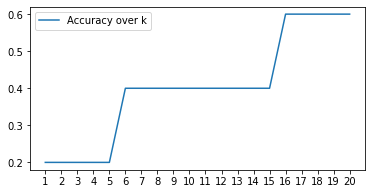

In [31]:
acc = []
for k in range(1,21):
    prediction = class_predict(train_list, test_list, k)
    print('\nNumber of neighbors:',k)
    print("Accuracy:",metrics.accuracy_score(df_test['construction_type'].to_numpy().tolist(), prediction))
    acc.append(metrics.accuracy_score(df_test['construction_type'].to_numpy().tolist(), prediction))

x = list(range(1,21))
plt.figure(figsize=(6,3))
plt.plot(x, acc, label = "Accuracy over k")
plt.xticks(x)
plt.legend()
plt.show()